In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
df=pd.read_csv("Tractor-Sales.csv")
df

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [3]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
df.tail()

,Month-Year,Number of Tractor Sold
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [5]:
df.shape

(144, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df["Month-Year"]

0      Jan-03
1      Feb-03
2      Mar-03
3      Apr-03
4      May-03
        ...  
139    Aug-14
140    Sep-14
141    Oct-14
142    Nov-14
143    Dec-14
Name: Month-Year, Length: 144, dtype: object

In [8]:
df["date"]=pd.to_datetime(df["Month-Year"],format="%b-%y")


In [9]:
df.head()

,Month-Year,Number of Tractor Sold,date
0,Jan-03,141,2003-01-01
1,Feb-03,157,2003-02-01
2,Mar-03,185,2003-03-01
3,Apr-03,199,2003-04-01
4,May-03,203,2003-05-01


In [10]:
df["date"].min()

Timestamp('2003-01-01 00:00:00')

In [11]:
df["date"].max()

Timestamp('2014-12-01 00:00:00')

In [12]:
df.drop(["Month-Year"],axis=1,inplace=True)

In [13]:
df.rename(columns={"Number of Tractor Sold":"Tractor_sold"},inplace=True)


In [14]:
df["Month"]=df["date"].dt.month_name()
df["Year"]=df["date"].dt.year

In [15]:
df.head()

,Tractor_sold,date,Month,Year
0,141,2003-01-01,January,2003
1,157,2003-02-01,February,2003
2,185,2003-03-01,March,2003
3,199,2003-04-01,April,2003
4,203,2003-05-01,May,2003


In [16]:
p1=pd.pivot_table(df,columns=["Month"],index=["Year"],
                 values="Tractor_sold")

In [17]:
p2=p1[["January", "February", "March", "April", "May",
    "June", "July", "August", "September", "October",
    "November", "December"]]

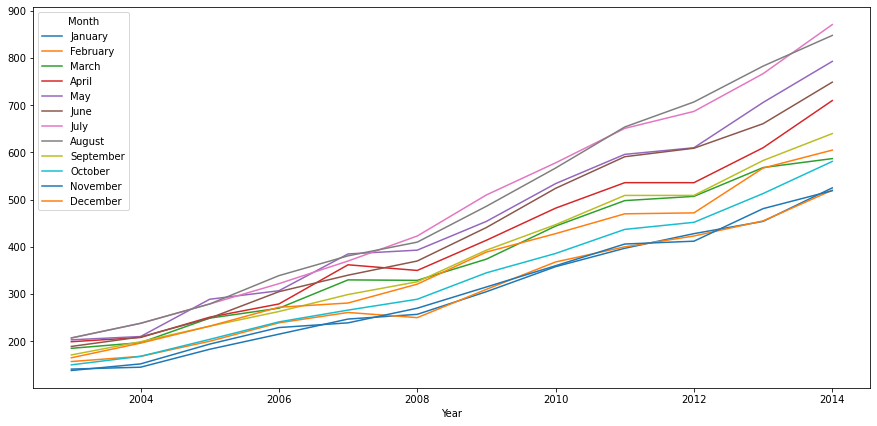

In [18]:
p2.plot(figsize=(15,7))
plt.show()

In [19]:
p3=pd.pivot_table(df,columns=["Year"],index=["Month"],
                 values="Tractor_sold")

In [20]:
p4=p3.reindex(index=(["January", "February", "March", "April", "May",
    "June", "July", "August", "September", "October",
    "November", "December"]))

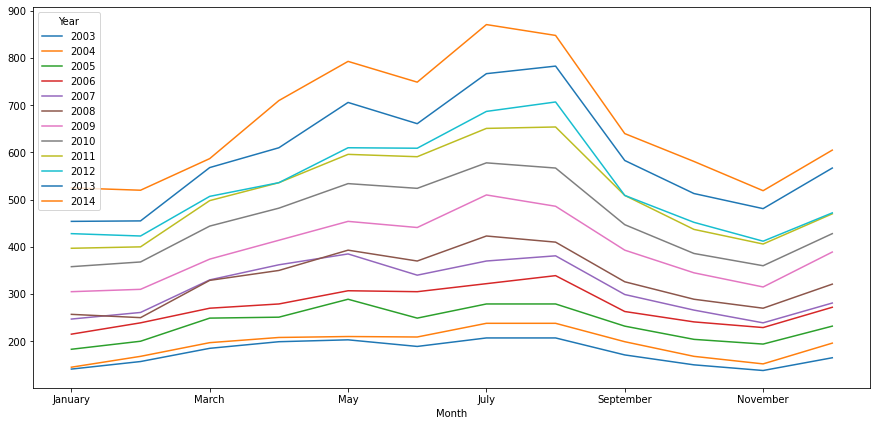

In [21]:
p4.plot(figsize=(15,7))
plt.show()

July and August seem to be the peek months for sales

In [22]:
df1=df.set_index(["date"])

In [23]:
df1.head(5)

,Tractor_sold,Month,Year
date,,,
2003-01-01,141,January,2003
2003-02-01,157,February,2003
2003-03-01,185,March,2003
2003-04-01,199,April,2003
2003-05-01,203,May,2003


In [24]:
df1.tail(2)

,Tractor_sold,Month,Year
date,,,
2014-11-01,519,November,2014
2014-12-01,605,December,2014


In [25]:
df1.isnull().sum()

Tractor_sold    0
Month           0
Year            0
dtype: int64

In [26]:
ts=df1.Tractor_sold

In [27]:
ts

date
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Tractor_sold, Length: 144, dtype: int64

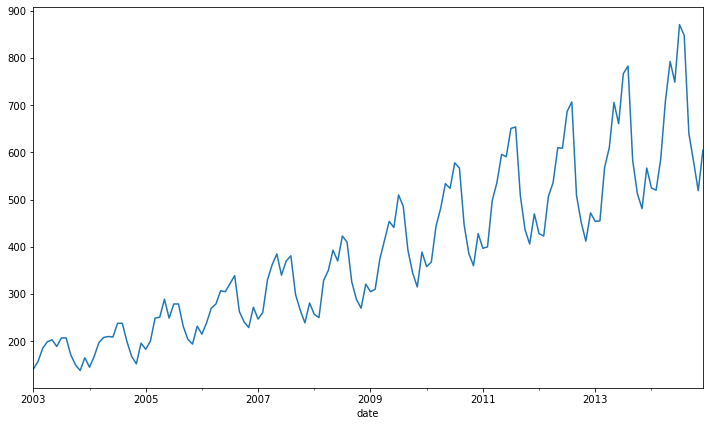

In [28]:
ts.plot(figsize=(12,7))
plt.show()

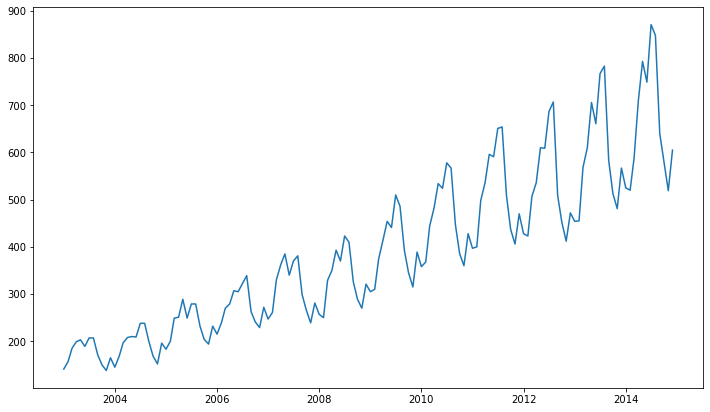

In [29]:
plt.figure(figsize=(12,7))
plt.plot(ts)
plt.show()

In [30]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(ts,model="multiplicative",two_sided=False,extrapolate_trend=4)

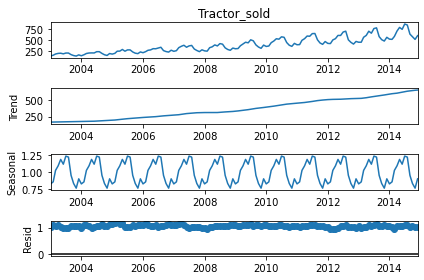

In [31]:
decompose.plot()
plt.show()

In [32]:
decompose.resid

date
2003-01-01    1.028907
2003-02-01    1.099557
2003-03-01    1.074350
2003-04-01    1.078424
2003-05-01    1.007438
                ...   
2014-08-01    1.078833
2014-09-01    1.038754
2014-10-01    1.071776
2014-11-01    1.038297
2014-12-01    1.018544
Name: resid, Length: 144, dtype: float64

In [33]:
decompose.seasonal

date
2003-01-01    0.823508
2003-02-01    0.853891
2003-03-01    1.024830
2003-04-01    1.092962
2003-05-01    1.187805
                ...   
2014-08-01    1.222687
2014-09-01    0.950868
2014-10-01    0.829943
2014-11-01    0.760143
2014-12-01    0.898956
Name: seasonal, Length: 144, dtype: float64

In [34]:
decompose.trend

date
2003-01-01    166.408333
2003-02-01    167.216667
2003-03-01    168.025000
2003-04-01    168.833333
2003-05-01    169.641667
                 ...    
2014-08-01    642.875000
2014-09-01    647.958333
2014-10-01    653.166667
2014-11-01    657.583333
2014-12-01    660.750000
Name: trend, Length: 144, dtype: float64

In [35]:
train=ts['2003-01-01':'2014-06-01']
test=ts['2014-07-01':"2014-12-01"]

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
alpha=0.5
beta=0.2
gamma=0.3
ets_model=ExponentialSmoothing(train,trend="mul",seasonal="mul",seasonal_periods=12)
ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Mrunali\AppData\Local\Temp/ipykernel_10600/458120426.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [37]:
fc=ets_fit.forecast(6)
fc

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2014-07-01    849.143512
2014-08-01    842.420417
2014-09-01    626.929944
2014-10-01    551.050763
2014-11-01    510.499347
2014-12-01    597.600405
Freq: MS, dtype: float64

In [38]:
test

date
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Tractor_sold, dtype: int64

In [39]:
print("MSE",np.mean((fc-test)**2))
print("RMSE",np.sqrt((np.mean(fc-test)**2)))
print("MAE",np.mean(np.abs((fc-test))))
print("MAPE",np.mean(np.abs((fc-test)/test)))

MSE 283.9393513988501
RMSE 14.39260214442414
MAE 14.39260214442414
MAPE 0.02204210011988422


In [40]:
np.linspace(0,1,9)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [41]:
a=np.linspace(0,.5,11)
b=np.linspace(0,.5,11)
c=np.linspace(0,.5,11)

min_mse=98765267384958576
min_a=0
min_b=0
min_c=0

for alpha in a:
    for beta in b:
        for gamma in c:
            ets_model=ExponentialSmoothing(train,trend="mul",seasonal="mul",seasonal_periods=12)
            ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)
            fc=ets_fit.forecast(6)
            mse=np.mean((fc-test)**2)
            if min_mse>mse:
                min_mse=mse
                min_a=alpha
                min_b=beta
                min_c=gamma
print(f"for alpha {min_a},beta {min_b},gamma{min_c},MSE :{min_mse}")



C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\AppData\Local\Temp/ipykernel_10600/1528136231.py:14: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: C

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ho

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ho

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ho

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\ba

for alpha 0.15000000000000002,beta 0.35000000000000003,gamma0.25,MSE :98.31000680477486


C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [42]:
print(f"for alpha {min_a},beta {min_b},gamma{min_c},MSE :{min_mse}")


for alpha 0.15000000000000002,beta 0.35000000000000003,gamma0.25,MSE :98.31000680477486


In [43]:
alpha=0.15000000000000002
beta=0.35000000000000003
gamma=0.25
ets_model=ExponentialSmoothing(train,trend="mul",seasonal="mul",seasonal_periods=12)
ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\AppData\Local\Temp/ipykernel_10600/2866329703.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)


In [44]:
fc1=ets_fit.forecast(6)
fc1

2014-07-01    857.953589
2014-08-01    856.903217
2014-09-01    647.901766
2014-10-01    565.057813
2014-11-01    520.316311
2014-12-01    609.696810
Freq: MS, dtype: float64

In [45]:
test

date
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Tractor_sold, dtype: int64

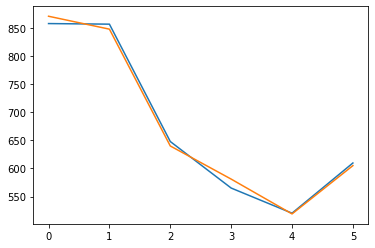

In [46]:
plt.plot(range(6),fc1,label="Predicted")
plt.plot(range(6),test,label="Actual")
plt.show()

In [47]:
alpha=0.15000000000000002
beta=0.35000000000000003
gamma=0.25
ets_model_full=ExponentialSmoothing(train,trend="mul",seasonal="mul",seasonal_periods=12)
ets_fit_full=ets_model_full.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Mrunali\AppData\Local\Temp/ipykernel_10600/3686443119.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit_full=ets_model_full.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [48]:
ets_fit_full.forecast(12)

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2014-07-01    857.953589
2014-08-01    856.903217
2014-09-01    647.901766
2014-10-01    565.057813
2014-11-01    520.316311
2014-12-01    609.696810
2015-01-01    564.993391
2015-02-01    568.695132
2015-03-01    685.658271
2015-04-01    761.359324
2015-05-01    854.331019
2015-06-01    821.767202
Freq: MS, dtype: float64

In [49]:
# Arima Model
from statsmodels.tsa.stattools import adfuller

In [50]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [51]:
ts0=ts.diff(1).dropna()
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts0)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.543481
p-value                          0.105250
#lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [52]:
ts0=ts.diff(2).dropna()
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts0)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.704359
p-value                          0.073287
#lags Used                      13.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [53]:
ts0=ts.diff(3).dropna()
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts0)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.936724
p-value                          0.041241
#lags Used                      10.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [54]:
ts0=np.log(ts).diff(2).dropna()
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ts0)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.200722
p-value                          0.019943
#lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


<AxesSubplot:xlabel='date'>

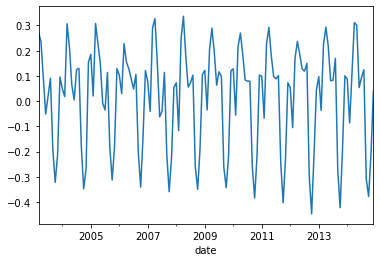

In [55]:
ts0.plot()

<AxesSubplot:xlabel='date'>

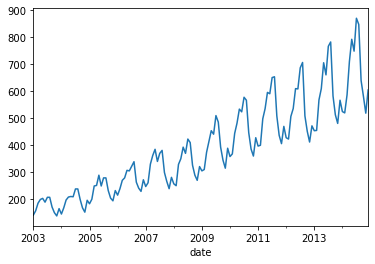

In [56]:
ts.plot()

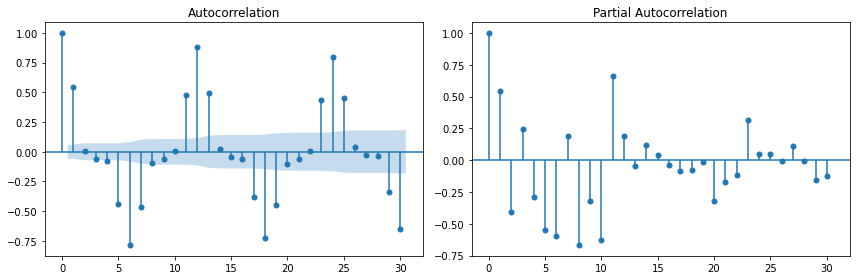

In [57]:
# from here d =2
fig,axes=plt.subplots(1,2,sharex=False,sharey=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts0,lags=30,ax=axes[0],alpha=0.5)
smt.graphics.plot_pacf(ts0,lags=30,ax=axes[1],alpha=1,method="ols")
plt.tight_layout()

In [58]:
ts0=np.log(ts)

In [59]:
train=ts0[: "2014-06-01"]
test=ts0['2014-07-01':]

In [60]:
import statsmodels.api as sm
model= sm.tsa.statespace.SARIMAX(train,order=(1,2,2),seasonal_order=(1,0,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Mrunali\anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                         Tractor_sold   No. Observations:                  138
Model:             SARIMAX(1, 2, 2)x(1, 0, [1], 12)   Log Likelihood                 219.577
Date:                              Thu, 22 Jun 2023   AIC                           -427.154
Time:                                      15:39:15   BIC                           -410.380
Sample:                                  01-01-2003   HQIC                          -420.341
                                       - 06-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5270      0.240     -2.198      0.028      -0.997      -0.057
ma.L1          3.64

In [62]:
fc=np.exp(model.forecast(6))
fc

2014-07-01    855.346890
2014-08-01    865.218754
2014-09-01    646.885154
2014-10-01    565.879445
2014-11-01    524.041877
2014-12-01    615.707296
Freq: MS, Name: predicted_mean, dtype: float64

In [63]:
test1=np.exp(test)
test1

date
2014-07-01    871.0
2014-08-01    848.0
2014-09-01    640.0
2014-10-01    581.0
2014-11-01    519.0
2014-12-01    605.0
Name: Tractor_sold, dtype: float64

In [64]:
print("MSE",np.mean((fc-test1)**2))
print("RMSE",np.sqrt(np.mean((fc-test1)**2)))

MSE 159.601434654011
RMSE 12.633346138454808


In [65]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()
                

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
#                 print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [66]:
auto_arima(train,regressors=None, p=range(0,3), d=range(0, 3), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:875.3544383222709
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:670.0614173263807
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-326.6317768595204
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-324.97639329983855
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:689.0305604742654
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:500.1829624086568
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-375.00785493489605
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-374.9364065789002
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-169.37047980257833
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-251.948558160692
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-412.6122166334147
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-437.5323242487947
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-168.99413197924162
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-249.15353388143288
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-426.1554158522098
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-447.74188277279416
SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-92.53934140753105
SARIMAX(0, 2,

In [67]:
model1 = sm.tsa.statespace.SARIMAX(train, order = (2,0,0), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [79]:
fc2=np.exp(model1.forecast(12))
fc2

2014-07-01    866.514521
2014-08-01    879.755192
2014-09-01    655.658492
2014-10-01    573.966412
2014-11-01    532.361319
2014-12-01    629.709788
2015-01-01    586.826765
2015-02-01    586.847416
2015-03-01    702.094597
2015-04-01    799.410539
2015-05-01    907.920010
2015-06-01    866.593585
Freq: MS, Name: predicted_mean, dtype: float64

In [80]:
test1=np.exp(test)
test1

date
2014-07-01    871.0
2014-08-01    848.0
2014-09-01    640.0
2014-10-01    581.0
2014-11-01    519.0
2014-12-01    605.0
Name: Tractor_sold, dtype: float64

In [81]:
print("MSE", np.mean((fc2-test1)**2))
print("RMSE", np.sqrt(np.mean((fc2-test1)**2)))

MSE 352.04499919220194
RMSE 18.762862233470724


In [82]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_MSE =np.inf

    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()
                fc_n=np.exp(temp_results.forecast(6))
                test_n=np.exp(test)
                MSE=np.mean((fc_n-test_n)**2)
                

                print("SARIMAX{}x{}12 - MSE :{}".format(param, param_seasonal, MSE))
                
                if MSE < best_MSE:
                    best_MSE = MSE
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
#                 print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - MSE :{}".format(best_pdq, best_seasonal_pdq, best_MSE))

In [83]:
auto_arima(train, regressors=None, p=range(0,3), d=range(0, 3), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - MSE :475361.6666666667
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - MSE :448911.5434443131
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - MSE :945.4652270607095
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - MSE :1064.5308923469208
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - MSE :466202.27770284313
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - MSE :414261.50080202956
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - MSE :958.1034998905458
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - MSE :1375.3301744708867
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - MSE :23070.99999999999
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - MSE :11447.605926771505
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - MSE :793.107110277398
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - MSE :178.19455223049545
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - MSE :22156.71393876917
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - MSE :11624.778656095945
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - MSE :655.2545691617212
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - MSE :194.54371192856323
SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - MSE :11114.86494020526
SARIMAX

In [84]:
model2 = sm.tsa.statespace.SARIMAX(train, order = (2,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [85]:
fc2=np.exp(model2.forecast(12))
fc2


2014-07-01    856.195214
2014-08-01    865.688712
2014-09-01    649.273651
2014-10-01    568.925618
2014-11-01    527.264442
2014-12-01    618.933867
2015-01-01    576.601600
2015-02-01    575.671335
2015-03-01    684.304969
2015-04-01    773.286936
2015-05-01    873.142471
2015-06-01    833.771503
Freq: MS, Name: predicted_mean, dtype: float64

In [86]:
test1=np.exp(test)
test1

date
2014-07-01    871.0
2014-08-01    848.0
2014-09-01    640.0
2014-10-01    581.0
2014-11-01    519.0
2014-12-01    605.0
Name: Tractor_sold, dtype: float64

In [87]:
print("MSE", np.mean((fc2-test1)**2))
print("RMSE", np.sqrt(np.mean((fc2-test1)**2)))

MSE 171.0528643587627
RMSE 13.078717993701167


In [90]:
dt=np.exp(model2.forecast(12))

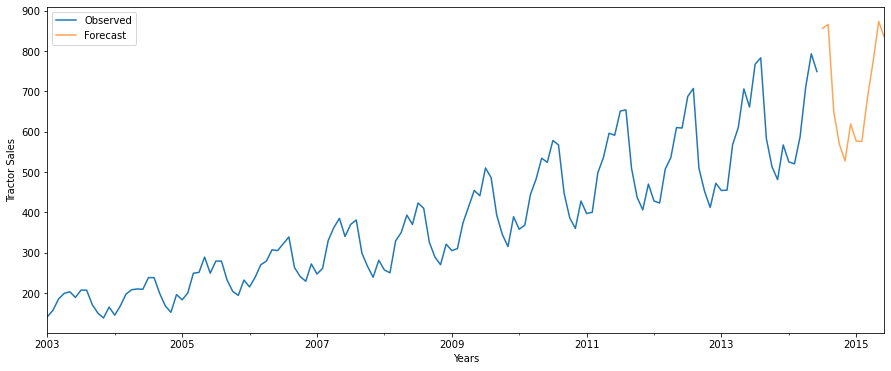

In [91]:
# plot the forecast along with the confidence band
axis = np.exp(train).plot(label='Observed', figsize=(15, 6))
dt.plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
# axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()